# Дрва на одлучување и ансамбли

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [6]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=10,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(5, 5), cov=10,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

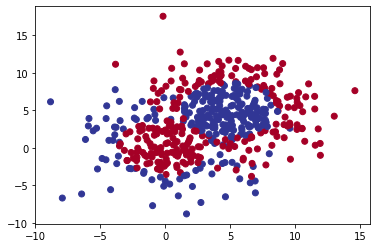

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Дрво на одлучување
### Влијание на длабочината на дрвото

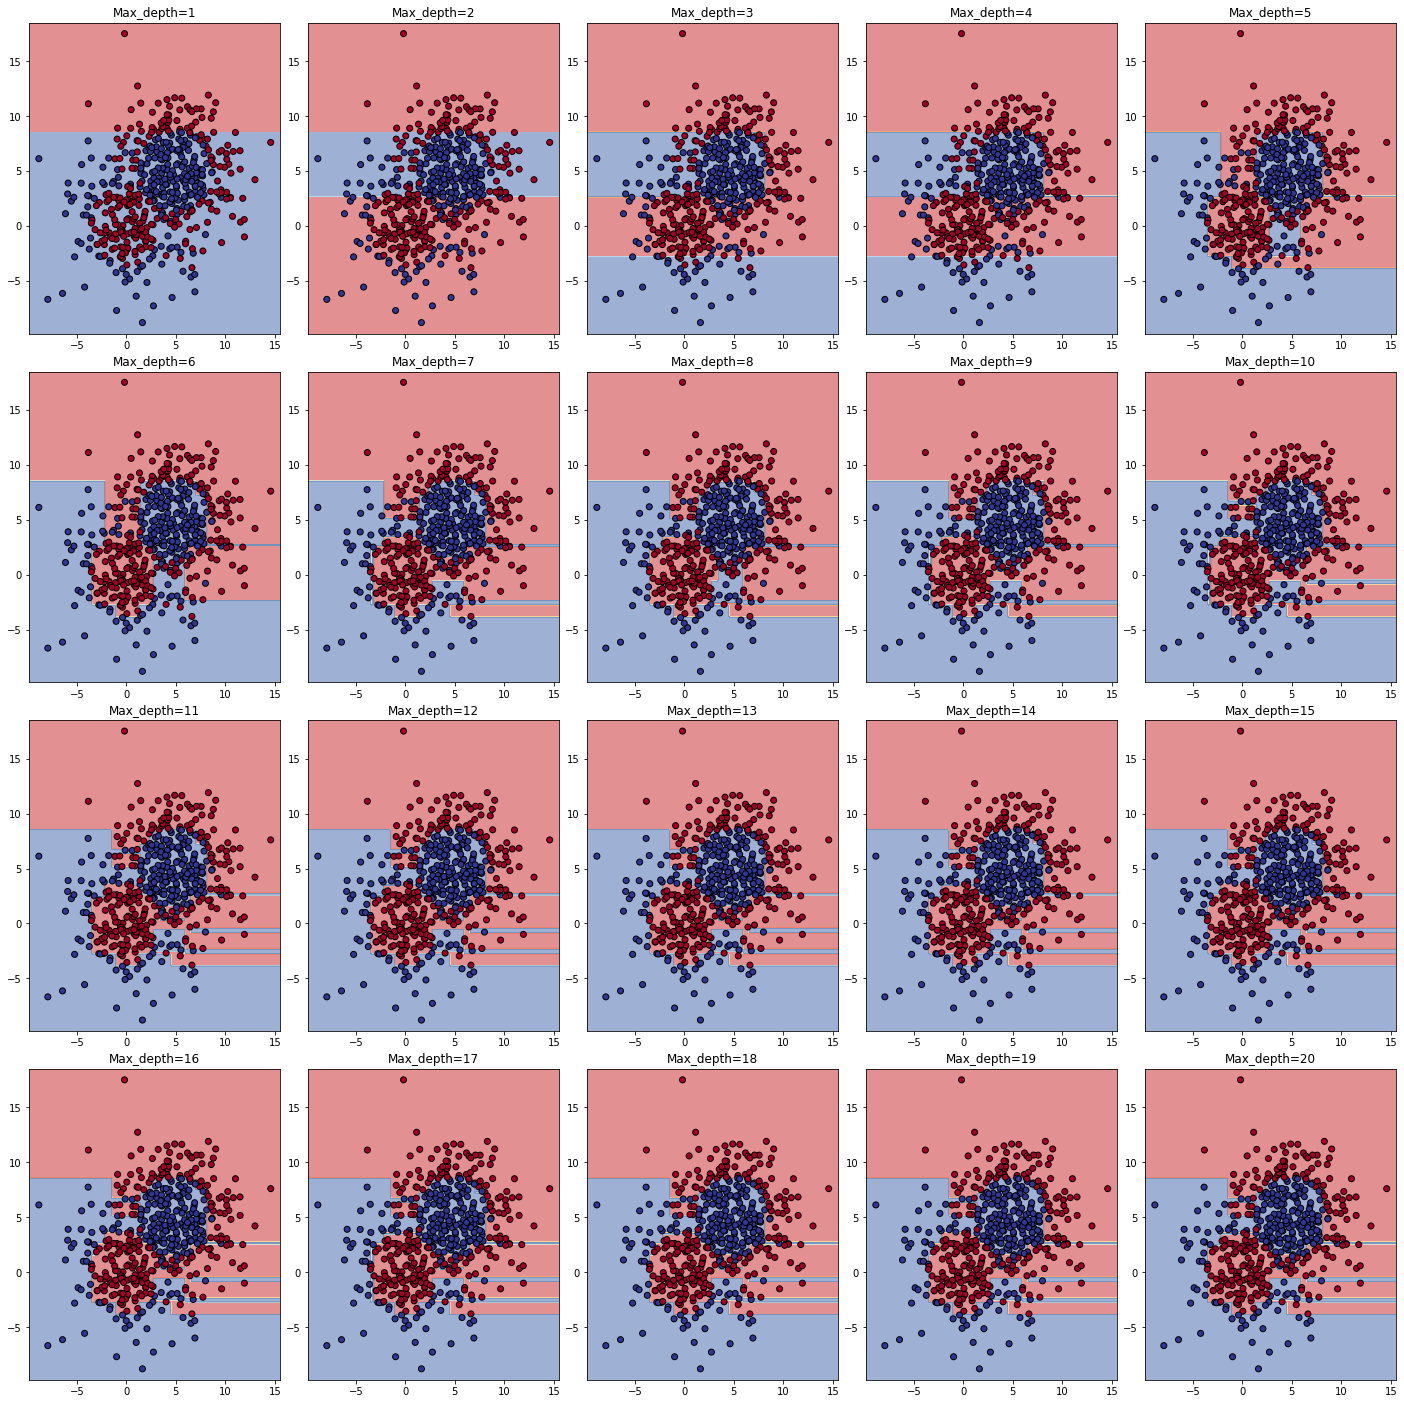

In [8]:
plt.figure(figsize=(20, 20))
depths = np.arange(0, 20) + 1

for i, depth in enumerate(depths):
    dtree = DecisionTreeClassifier(max_depth=depth, min_samples_split=2)
    dtree.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(depths.shape[0]//5, 5, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f"Max_depth={depth}")

### Влијание на минималниот број на податоци за разгранување на дрвото

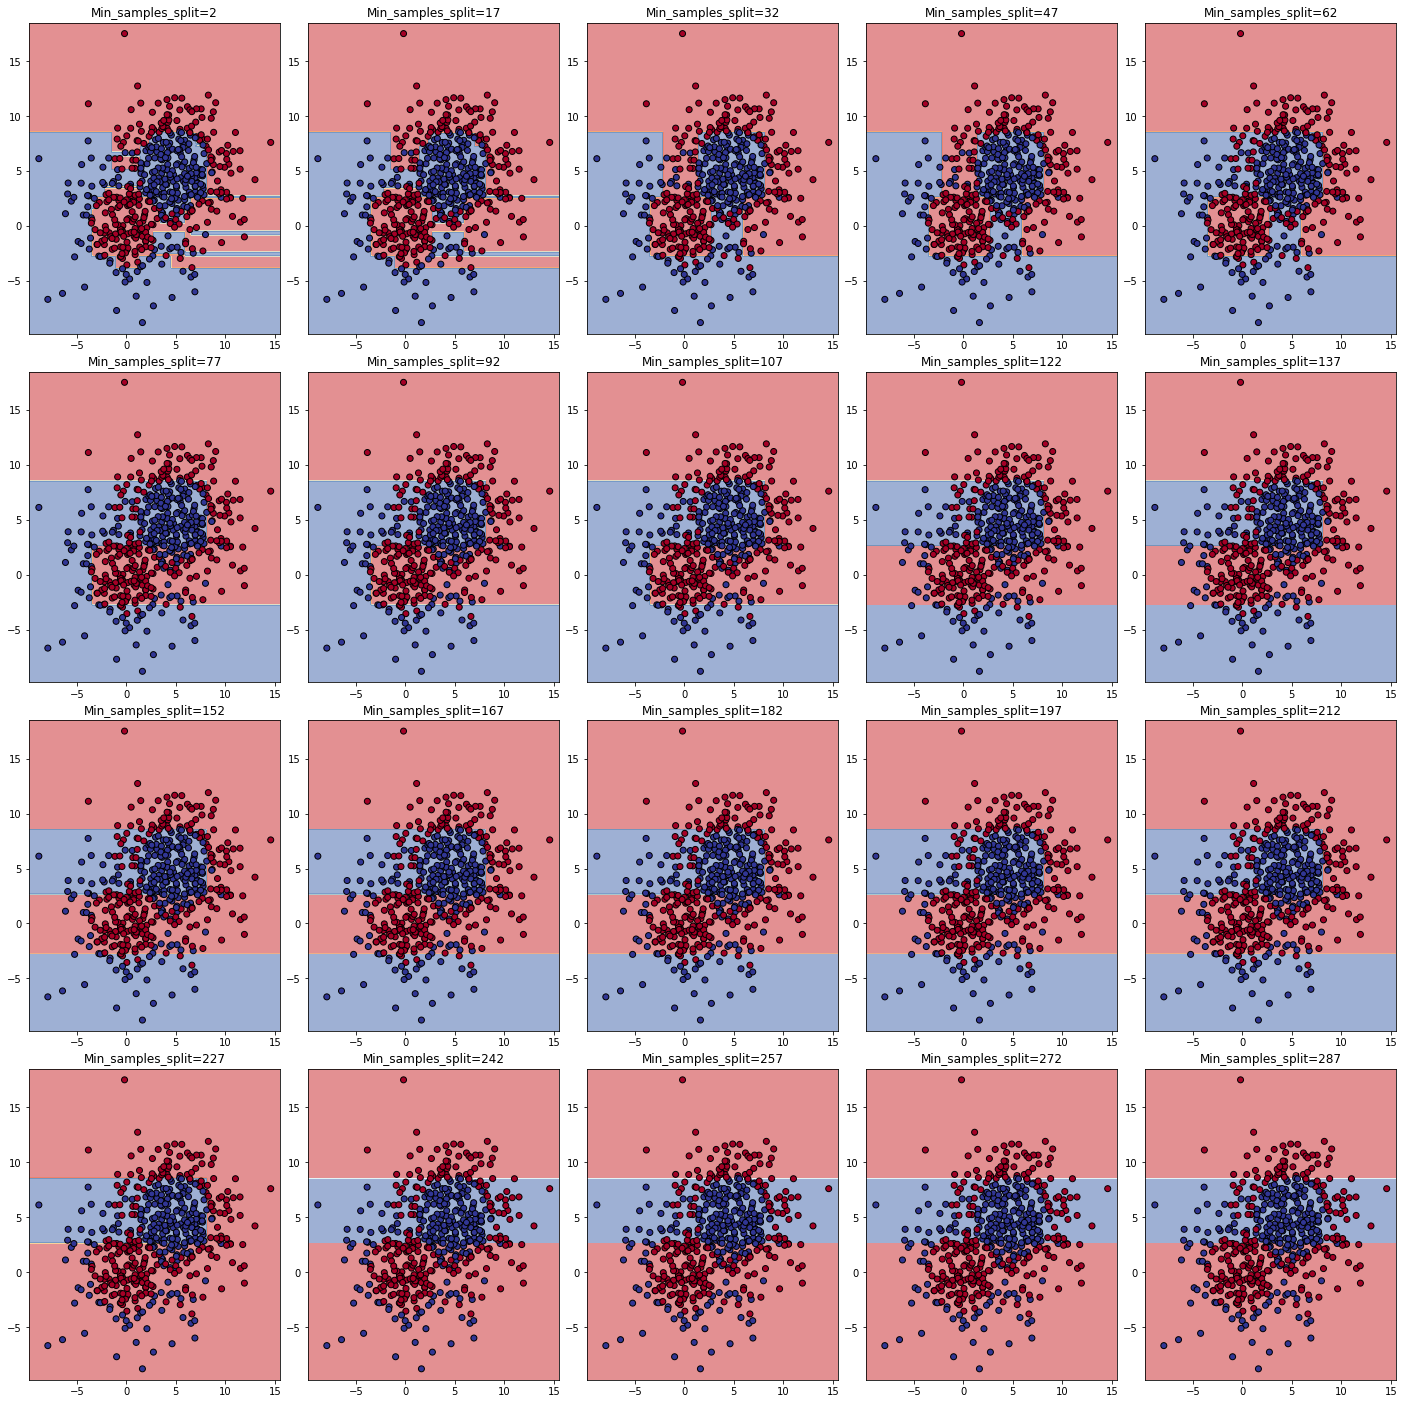

In [9]:
plt.figure(figsize=(20, 20))
splits = np.arange(0, 300, 15) + 2

for i, split in enumerate(splits):
    dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=split)
    dtree.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(splits.shape[0]//5, 5, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f"Min_samples_split={split}")

## Random Forest
### Влијание на бројот на дрва со висока пристрасност(bias)

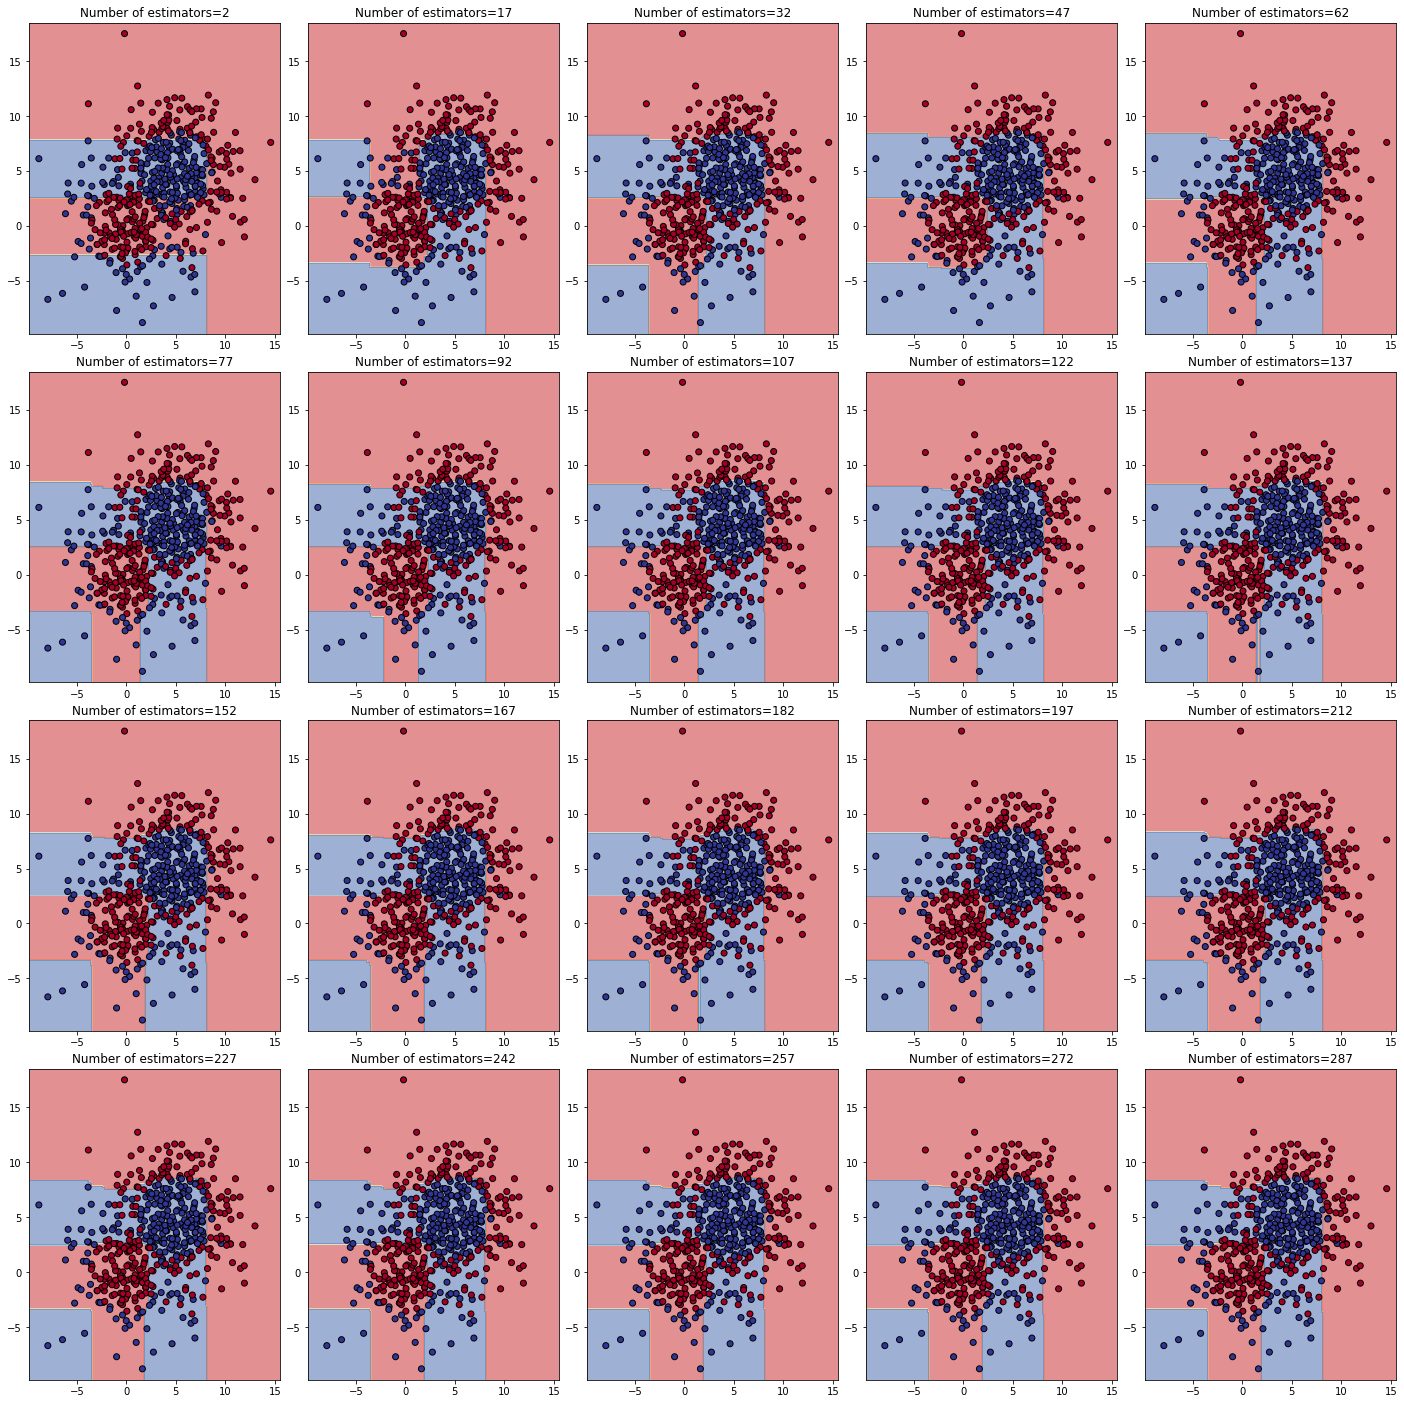

In [10]:
plt.figure(figsize=(20, 20))
nrs = np.arange(0, 300, 15) + 2

for i, nr in enumerate(nrs):
    dtree = RandomForestClassifier(n_estimators=nr, max_depth=2, min_samples_split=2, random_state=1)
    dtree.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(nrs.shape[0]//5, 5, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f"Number of estimators={nr}")

### Влијание на бројот на дрва со висока варијанса

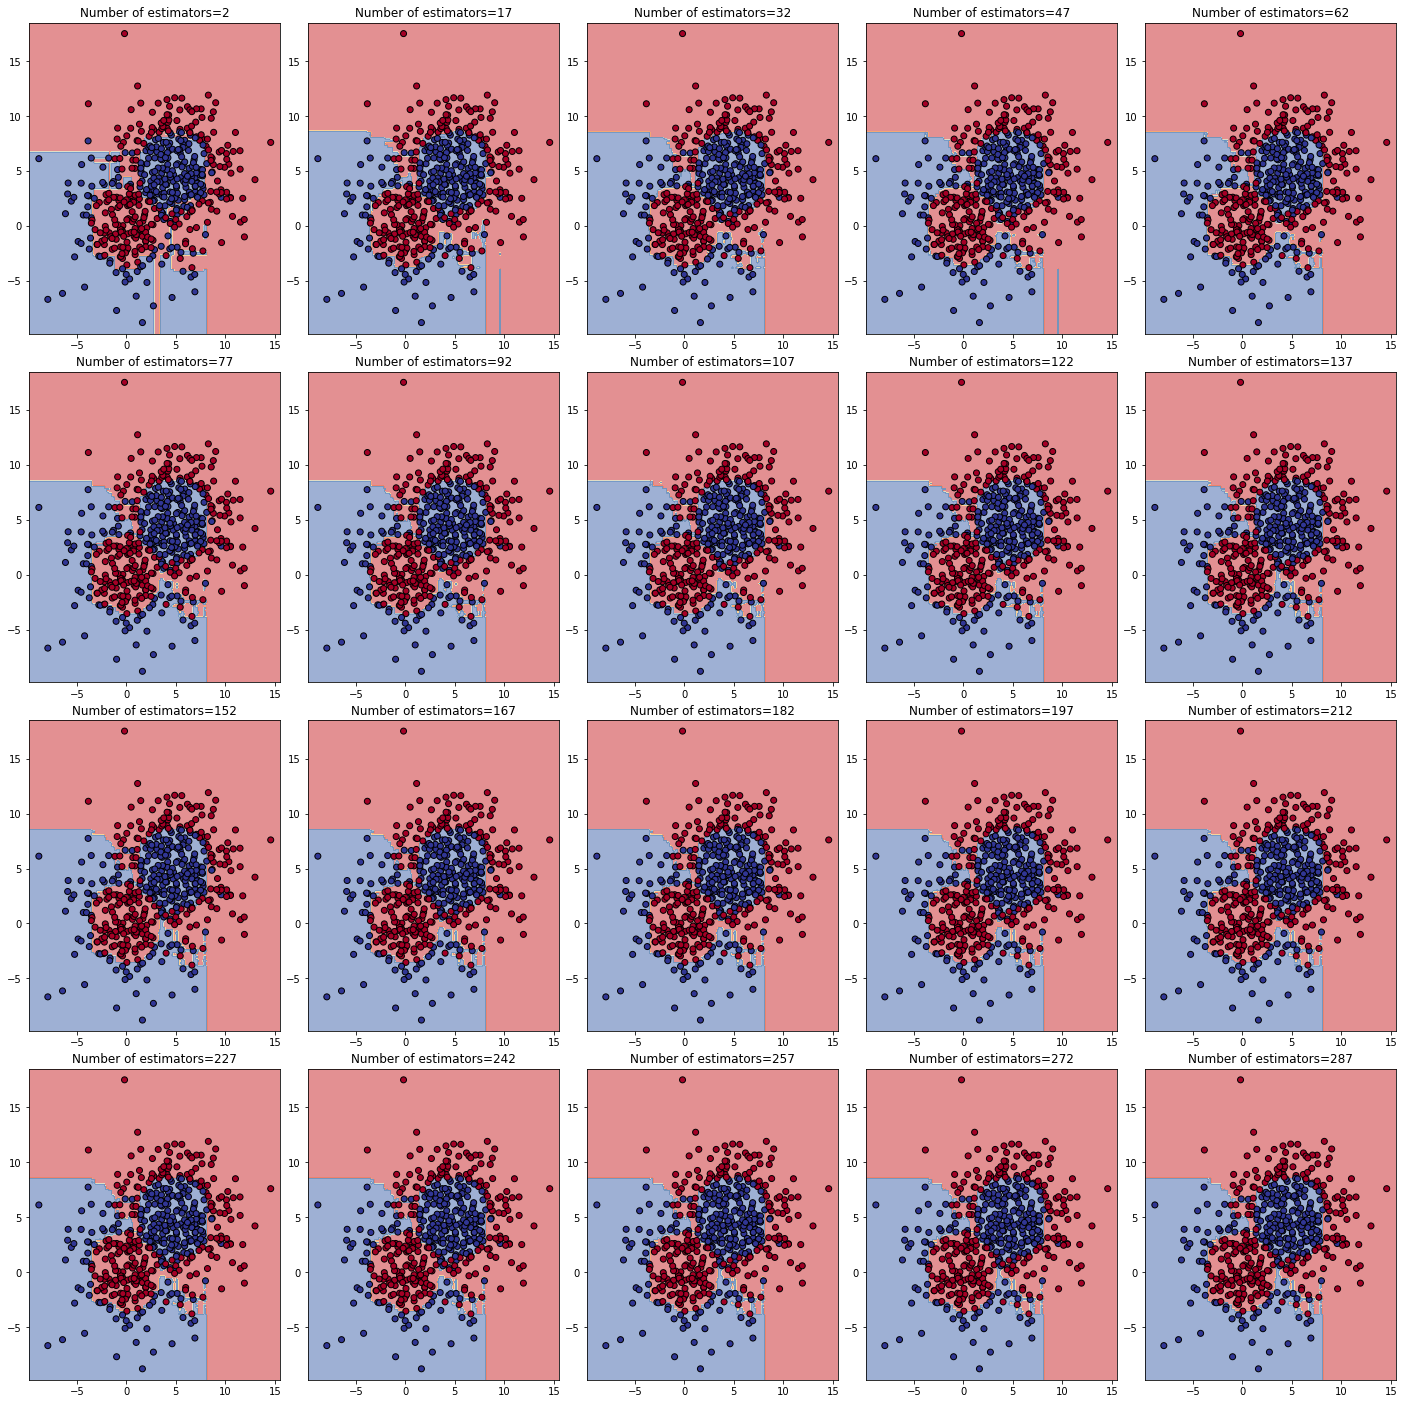

In [11]:
plt.figure(figsize=(20, 20))
nrs = np.arange(0, 300, 15) + 2

for i, nr in enumerate(nrs):
    dtree = RandomForestClassifier(n_estimators=nr, max_depth=None, min_samples_split=2, random_state=1)
    dtree.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(nrs.shape[0]//5, 5, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f"Number of estimators={nr}")

## Adaboost
### Влијание на бројот на класификатори

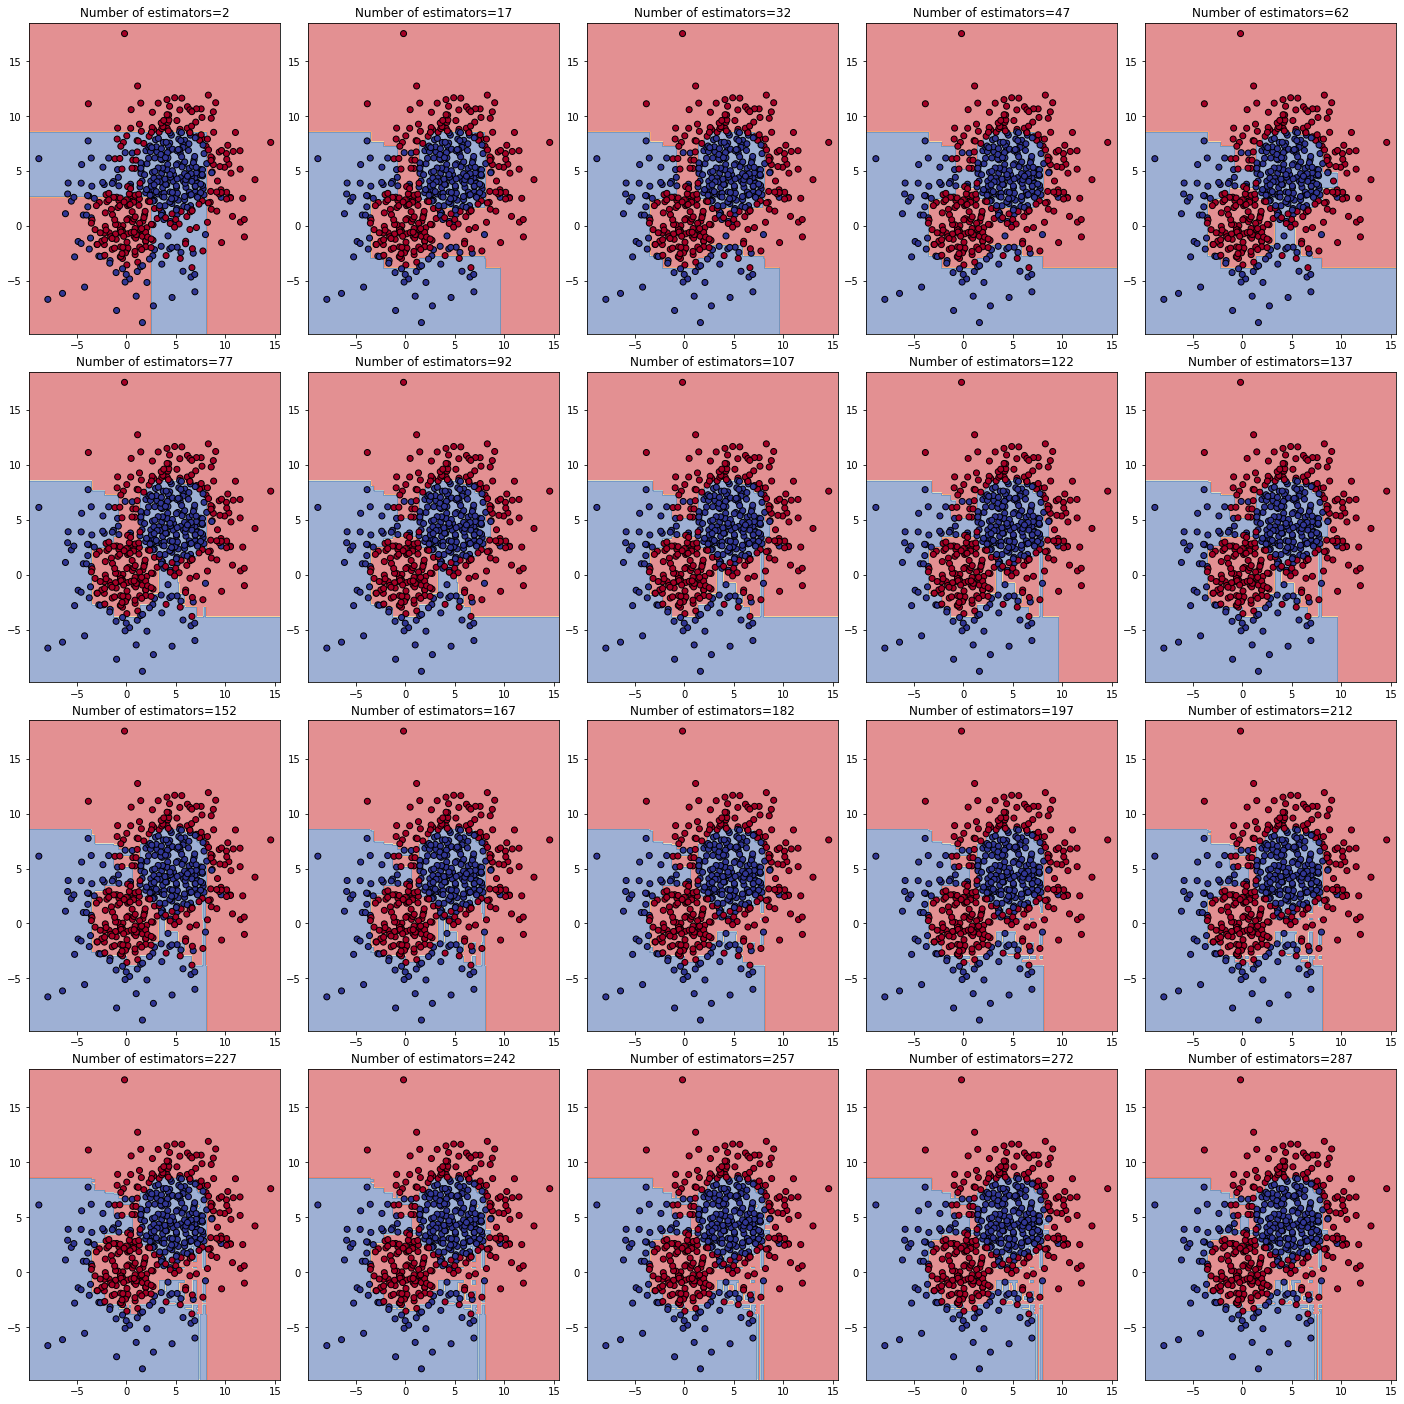

In [12]:
plt.figure(figsize=(20, 20))
nrs = np.arange(0, 300, 15) + 2

for i, nr in enumerate(nrs):
    dtree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=nr, learning_rate=0.1, random_state=1)
    dtree.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(nrs.shape[0]//5, 5, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f"Number of estimators={nr}")

# Дрво на одлучување
## Предвидување на преживеани во Titanic податочното множество

Податоците за преживеаните патници од бродот Titanic ќе ги искористиме за да изградиме модел кој ќе предвидува кој има поголема веројатност да преживее.

Податочното множество ги содржи следните колони:

* **PassengerId:** Идентификациски број на патникот
* **Pclass:** Патничка класа
* **Name:** Име на патникот
* **Sex:** Пол на патникот
* **Age:** Возраст на патникот
* **SibSp:** Број на браќа-сестри/брачен другар кои што се со патникот на бродот
* **Parch:** Број на родители/деца кои што се со патникот на бродот
* **Ticket:** Број на билетот
* **fare:** Цена на билетот
* **Cabin:** Број на кабина во која бил сместен патникот
* **Embarked:** Пристаниште каде се качил патникот
* **Survival:** Дали преживеал патникот

Дополнителни податоци:
Pclass: Алтернатива за социо-економската состојба на патникот
1st = Прва класа
2nd = Средна класа
3rd = Ниска класа

age: Возраста може да биде и рацинален број за патници помали од 1 година

sibsp: Роднинските врска можат да бидат претставени на следниот начин...
Sibling = брат, сестра, полубрат, полусестра
Spouse = Сопруг, сопруга (верениците се игнорирани)

parch: Роднинските врска можат да бидат претставени на следниот начин
Parent = мајка, татко
Child = ќерка, син, полусин, полуќерка
Некои деца патувале само со дадилка, последователно parch=0 за нив.

## Користени библиотеки

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import tree

In [14]:
data = pd.read_csv('titanic_train.csv')

## Остранување на NaN 

In [15]:
data = pd.read_csv('titanic_train.csv', 
                   dtype={'Pclass': 'uint8', 'Age': 'float16', 'SibSp': 'uint8', 'Parch': 'uint8', 'Survived': 'bool'}, 
                   usecols=range(1, 12))

data.dropna(axis=0, subset=['Embarked'],  inplace=True)

data.drop(columns='Cabin', inplace=True)

means = data.groupby(['Sex', 'Pclass'])['Age'].mean()
for sex, pclass in means.index:
    data.loc[data['Age'].isnull() & (data['Sex'] == sex) & (data['Pclass'] == pclass), 'Age'] = means[sex][pclass]

## Конвертирање на текстуални вредности во нумерички

In [16]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

Дрвата на одлучување можат да работат со редоследни(ordinal) категорички карактеристики. Поради тоа, нема потреба од one-hot-encoding за патничката класа бидејќи повисок број означува повисока цена на билет, позначаен статус, кабина која е поблиску до палубата, итн.

Дрвата на одлучување можат да дадат лоши резултати кај номиналните категорички карактеристики доколку не се применува one-hot-encoding. Доколку се малку на број ова може да биде во ред. При голем број на вакви карактеристики може да настане проблем во предвидувањето. Доколку се познава редоследот на закотвување на бродот при секое од пристаништата тогаш може да се примени карактеристиката и без one-hot-encoding.

In [17]:
data = pd.concat([data, 
                  pd.get_dummies(data['Embarked'], prefix='Embarked', drop_first=True)], axis=1)

In [18]:
data.drop(columns='Embarked', inplace=True)

# Градење на модел на дрво на одлучување

In [19]:
X = data.drop(columns=['Name', 'Survived', 'Ticket'])
y = data['Survived']

## Поделба на множеството

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 1/3, random_state=0)

## Тренирање и евалуација

In [21]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=12)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=12)

In [22]:
predicts = model.predict(X_test)
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83       177
        True       0.76      0.68      0.72       120

    accuracy                           0.78       297
   macro avg       0.78      0.77      0.77       297
weighted avg       0.78      0.78      0.78       297



## Визуелизација на дрвото

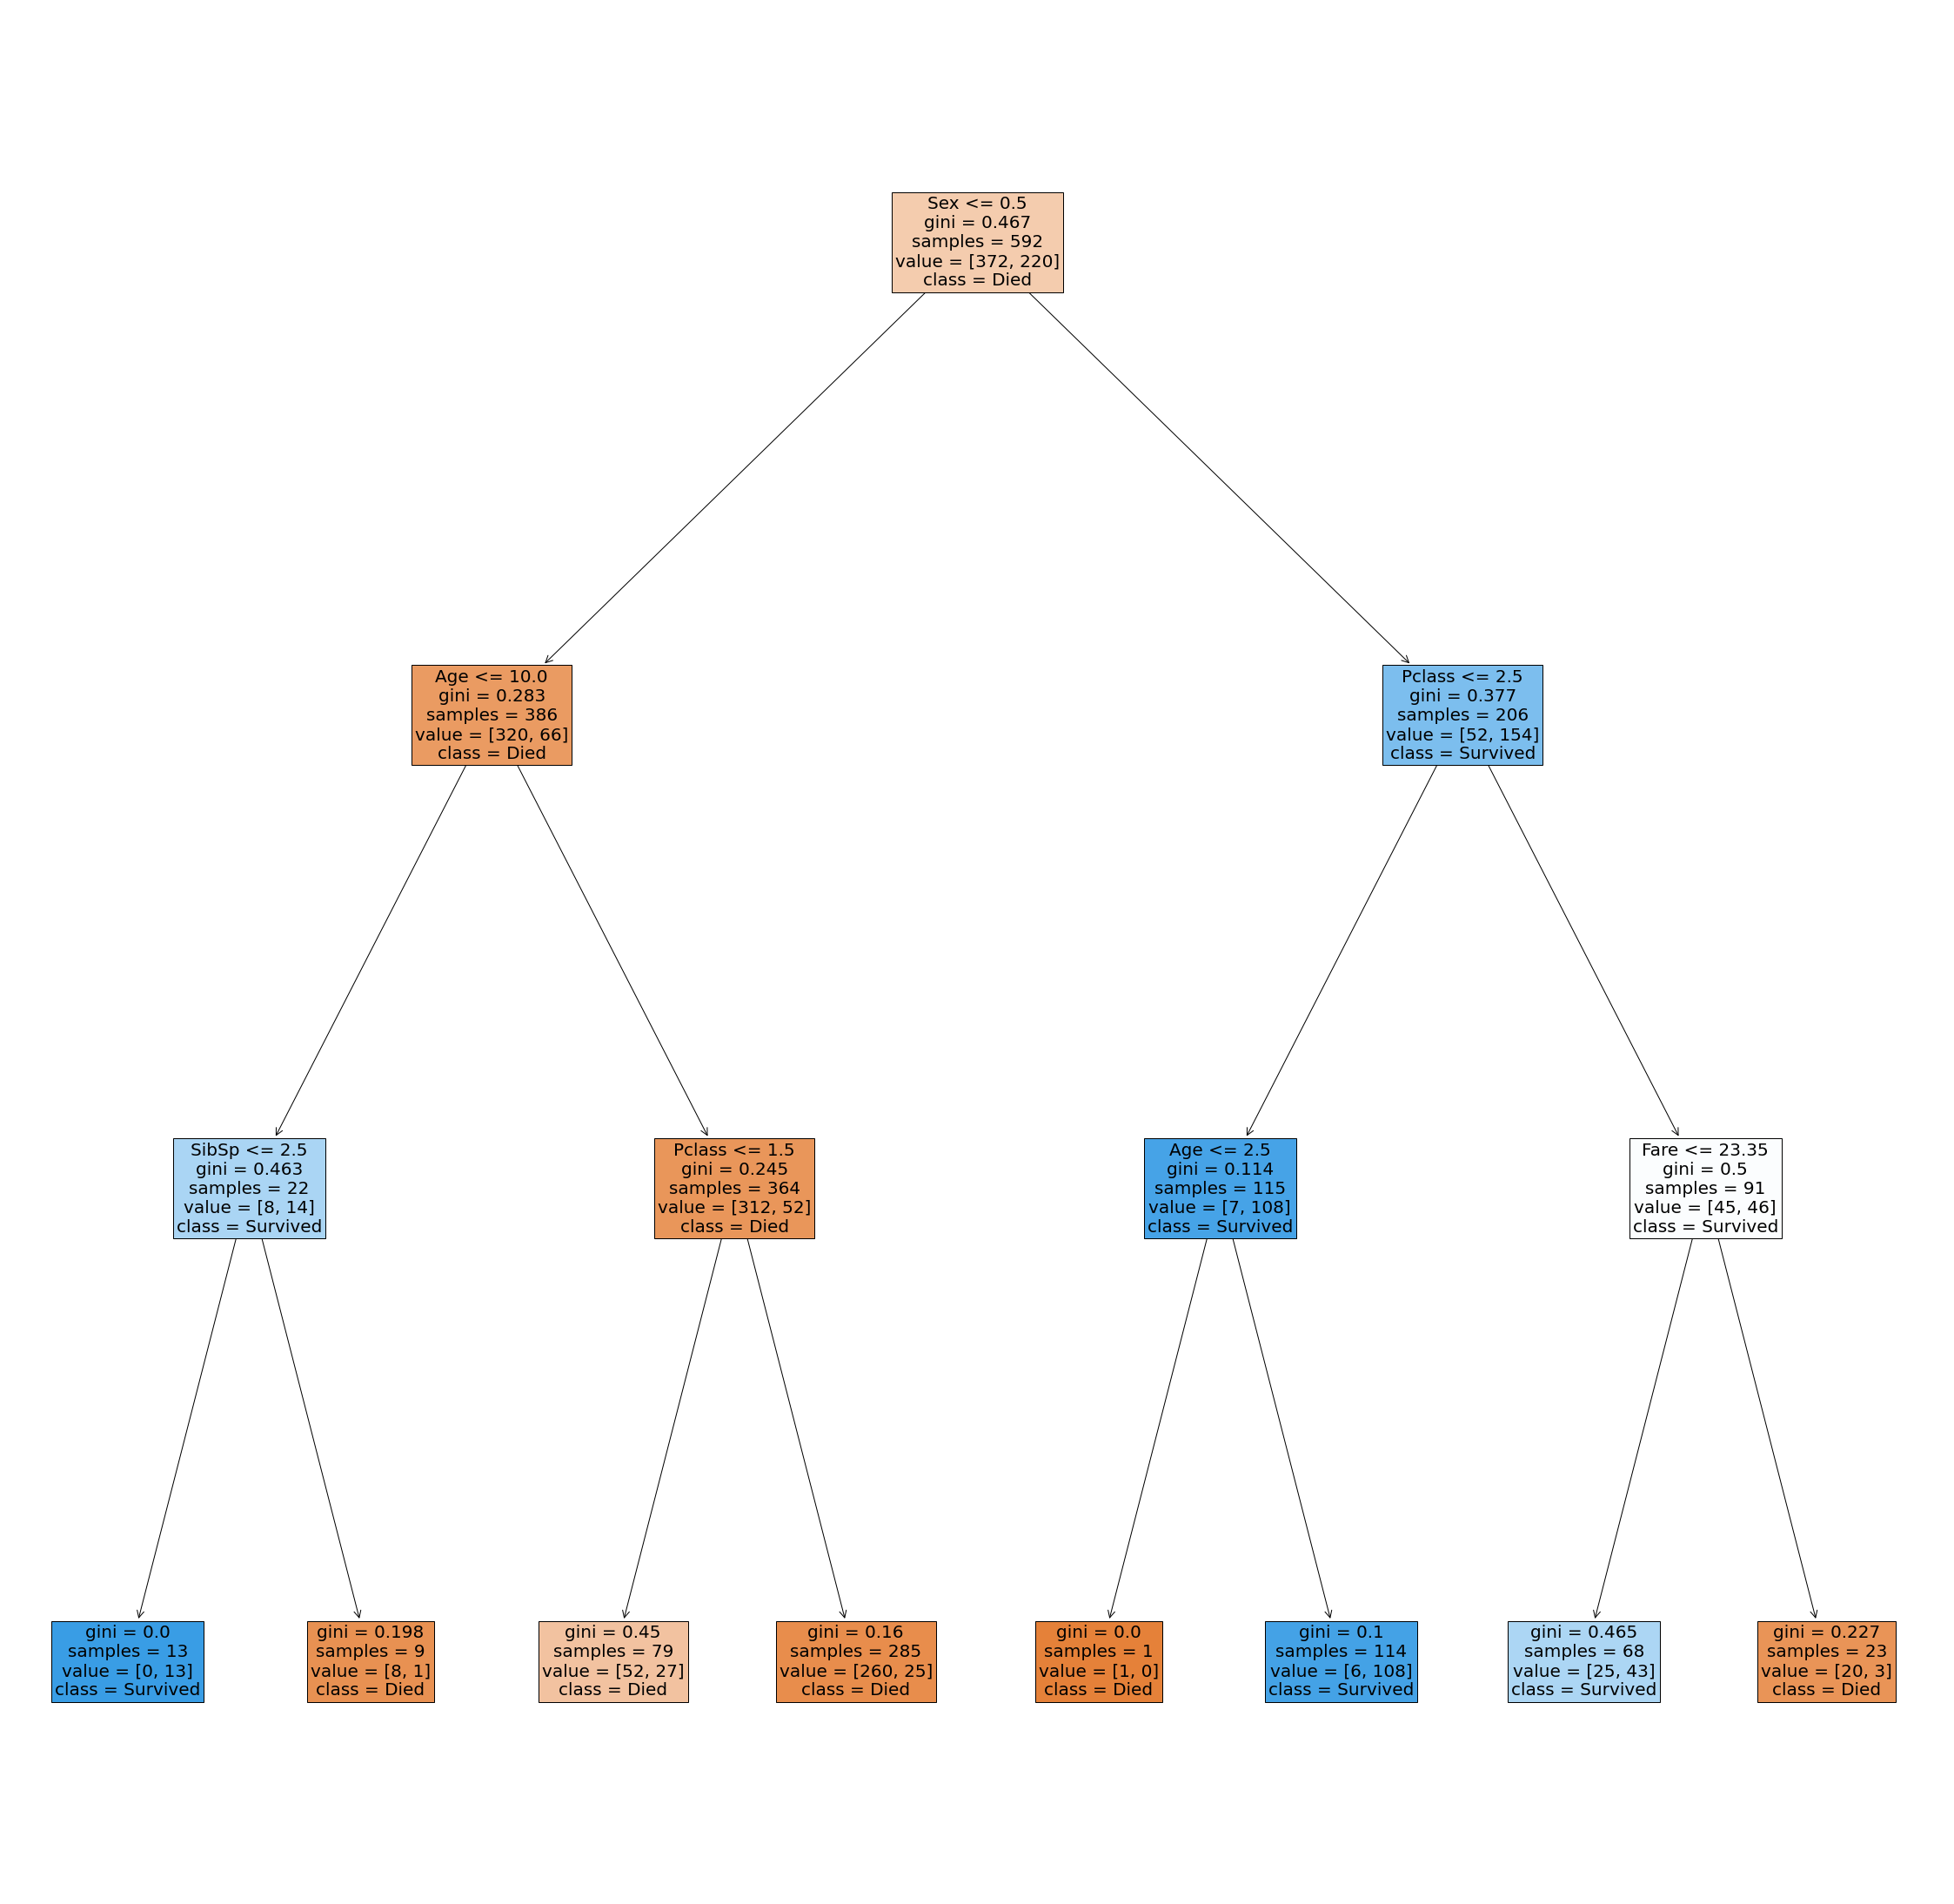

In [23]:
plt.figure(figsize=(40, 40))
tree.plot_tree(model, fontsize=20, feature_names=X.columns, filled=True, class_names=['Died', 'Survived'])
plt.show()
# Left -> True; Right >- False

Визуелизацијата на дрвата ни овозможува да го надминеме проблемот на „црна кутија“ кој настануваше кај другите модели. Според тоа од дрвото можеме да ги извлечеме следните заклучоци:
1. Мнозинството од возрасните мажи, без разлика на патничката класа, загинале.
2. Од машкиот род преживеале само децата под 10 години кои имале под 3 браќа/сестри.
3. Мнозинството од жените преживеале, со исклучок на оние кои биле во трета патничка класа со поскапи билети од 23.35

## Намалување на бројот на димензии
За да можеме да ги вклучиме параметрите на PCA во Gridsearch, ќе примениме Pipeline. Бидејќи PCA не работи добро на категорички карактеристики, потребно е PCA да се извршува само на нумеричките. За таа намена ќе напишеме рачно израбоена функција која ќе ја вметнеме во Pipeline.

In [24]:
class customPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None, svd_solver='auto', cat_feat=[]):
        self.n_components = n_components
        self.svd_solver = svd_solver
        self.pca = PCA(n_components=n_components, svd_solver=svd_solver)
        self.cat_feat = cat_feat
    
    def fit(self, X, y=None):
        self.num_feat = ~np.in1d(np.arange(0, X.shape[1]), self.cat_feat)
        self.pca.fit(X[:, self.num_feat])
        return self
    
    def transform(self, X, y=None):
        X_return = np.hstack((self.pca.transform(X[:, self.num_feat]), X[:, self.cat_feat]))
        return X_return

## Градењe на Pipeline и спроведување на GridSearch според повеќе параметри од моделот и OCA

In [25]:
pipe = Pipeline([('pca', customPCA()), ('ada', AdaBoostClassifier(DecisionTreeClassifier()))])
                
param_grid = {'ada__base_estimator__max_depth': [None, 1, 2, 3, 5, 7, 10, 50], 
              'ada__base_estimator__min_samples_split': [2, 5, 12, 30], 
              'ada__base_estimator__criterion': ['entropy'], 
              'ada__n_estimators': [3, 5, 7, 10, 30, 50, 100], 
              'ada__learning_rate': [0.1, 1], 
              'pca__n_components': [1, 0.9999]} 

grid = GridSearchCV(pipe, 
                    param_grid, 
                    scoring='f1', 
                    refit=True,
                    n_jobs=12,
                    cv=5,
                    verbose=1)
cv_results = grid.fit(X_train,y_train)

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   16.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   36.4s
[Parallel(n_jobs=12)]: Done 940 tasks      | elapsed:   48.2s
[Parallel(n_jobs=12)]: Done 1840 tasks      | elapsed:   59.2s
[Parallel(n_jobs=12)]: Done 2940 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 3998 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 4480 out of 4480 | elapsed:  2.1min finished


In [26]:
cv_results.best_estimator_

Pipeline(steps=[('pca', customPCA(n_components=1)),
                ('ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                          max_depth=5,
                                                                          min_samples_split=30),
                                    learning_rate=0.1, n_estimators=3))])

In [27]:
cv_results.best_score_

0.769957264957265

In [28]:
predicts = cv_results.predict(X_test)
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

       False       0.67      0.91      0.77       177
        True       0.71      0.33      0.45       120

    accuracy                           0.67       297
   macro avg       0.69      0.62      0.61       297
weighted avg       0.68      0.67      0.64       297



Може да се забележи дека поради тоа што беше спроведен GridSearch користејќи многу параметри и различни опсези на вредност, постапката премина кон модел кој прави overfitting. Причината за тоа е поради преголемиот број различни вредности за параметрите. Колку повеќе правиме нагодување на параметрите на множеството за валидација толку повеќе тежнееме кон overfitting. Поради тоа препорачливо е да се спроведува GridSearch за мал број на параметри. Особено се препорачува кога податочното множество за тренирање е мало.